### imports

In [1]:
import matplotlib as plt
from openai import OpenAI
import random
import os
from PIL import Image
import io
import base64
import json
from tqdm import tqdm
import re
import ast

### helper functions (extracting code, questions, answers, choices)

In [2]:
def extract_code(response):
    # Look for code blocks delimited by ```python and ```
    code_pattern = re.compile(r'```python(.*?)```', re.DOTALL)
    matches = code_pattern.findall(response)
    # Join all matches into a single string of code
    return '\n'.join(matches).strip()
        
def extract_question_and_answer(script):
    # Extract question marked by <<<QUESTION>>>
    question_match = re.search(r'<<<QUESTION>>>\s*(.*?)<<<CHOICES>>>', script, re.DOTALL)
    question = question_match.group(1).strip() if question_match else None
    
    # Extracting the choices
    choices_match = re.search(r'<<<CHOICES>>>\s*(.*?)<<<CHOICES>>>', script, re.DOTALL)
    choices_str = choices_match.group(1).strip() if choices_match else None
    """
    question_match = re.search(r'<<<QUESTION>>>(.*?)<<<QUESTION>>>', script, re.DOTALL)
    question = question_match.group(1).strip() if question_match else None

    choices_match = re.search(r'<<<CHOICES>>>(.*?)<<<CHOICES>>>', script, re.DOTALL)
    choices = choices_match.group(1).strip() if question_match else None
    """
    answer_match = answer = re.search(r'Answer:\s*(.*)', script)
    answer = answer_match.group(1) if answer_match else None
    """
    answer_match = re.search(r'Answer:\s*(\w+)', script)
    answer = answer_match.group(1) if answer_match else None
    """
    return question, answer, choices_str

def generate_random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def generate_random_bar_chart_type():
    return random.choice(["horizontal bar chart", "stacked bar chart", "bar chart", "grouped bar chart"])
    
def generate_random_bar_chart_topic():
    return random.choice(["Cities","Animals","Dog","Cat","Toys","Weather","Grades","Land","Water","Books","Paintings",
                           "Technology","Computer","Phone","Birds","Countries","Sports","Movies","Music","Food","Cars",
                           "Plants","Health","Education","Employment","Income","Hobbies","Travel","Transportation",
                           "Internet Usage","Energy Sources","Population Growth","Housing","Environmental Issues",
                           "Fashion","Fitness","Historical Events","Languages","Festivals","Gaming","Social Media",
                           "Literature","Architecture","Medicine","Politics","Space Exploration","Economy","Crime Rates",
                           "Wildlife Conservation","Natural Disasters","Real Estate","Global Warming","Agriculture",
                           "Fishing","Forestry","Retail","Advertising","Tourism","Charity","Public Opinion Polls"
    ]
    )

def generate_random_question_type():
    return random.choice([("multiple choice", "numerical"), ("yes or no", "yes or no")])
    
def generate_random_color_instruct(upper_bound):
    num_colors = random.randint(0, upper_bound)
    color_instruct = ""
    colors = set()
    while len(colors) < num_colors:
        new_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        if new_color not in colors:
            colors.add(new_color)
    if len(colors) != 0:
        color_instruct = f"The bars in the bar chart must use at least the following colors, but feel free to use more: {colors}."
    return color_instruct

def generate_random_hatch_instruct(upper_bound):
    num_hatches = random.randint(0, upper_bound)
    hatch_instruct = ""
    if(random.random() < 0.5):
        hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*', '//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**', '/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']
        hatches_to_ret = random.sample(hatches, num_hatches)
        if num_hatches != 0:
            hatch_instruct = f"The bars in the bar chart must use at least the following hatches, but feel free to use more hatches or leave some bars blank: hatches = {hatches_to_ret}."
    return hatch_instruct

def get_id(category, file_path_prefix, subdir, i):
    return f"{category}-{file_path_prefix}-{subdir}-{i}"

def convert_choices_string_to_list(list_string):
    python_list = ast.literal_eval(list_string)
    return python_list
    

### saving images in directory + questions and answers in data.json

In [3]:
# Function to save data to a JSON file
def save_to_json_file(file_path, data):
    print("entered json function")
    try:
        # Check if file exists
        if os.path.isfile(file_path):
            print(f"JSON file exists: {file_path}")
            # Read the existing data
            with open(file_path, 'r') as file:
                existing_data = json.load(file)
        else:
            print(f"JSON file does not exist, creating a new one: {file_path}")
            existing_data = []

        # Append the new data
        existing_data.append(data)

        # Write the updated data back to the file
        with open(file_path, 'w') as file:
            json.dump(existing_data, file, indent=4)
        print("Data successfully saved.")
    except Exception as e:
        print(f"An error occurred: {e}")

### TODO: set variables

In [4]:
#TODO: set vars
num_samples = 200
category = "bar_charts"
file_path_prefix = "bar_charts_visual_linguistic"
subdir =  "train" # must be train or test
json_file_path = category + "/" + file_path_prefix + f"_{subdir}" + ".json"
print(json_file_path)
# print(f"{category}/{file_path_prefix}/{subdir}/1.png")

bar_charts/bar_charts_visual_linguistic_train.json


### api calls/data generation

  0%|                                                                                                                                         | 0/39 [00:00<?, ?it/s]

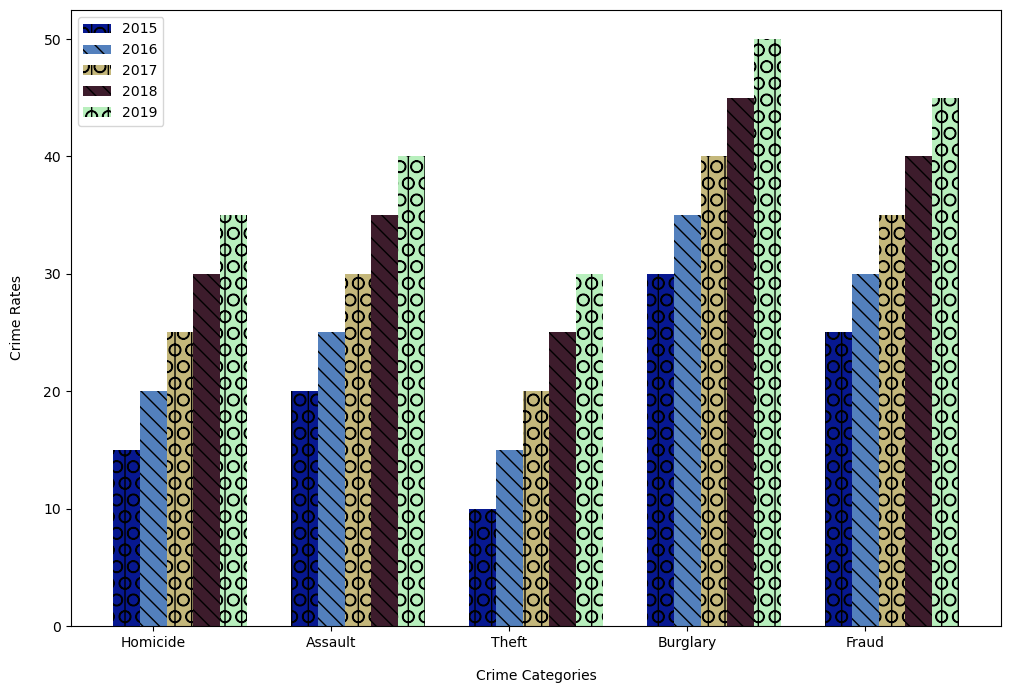

  3%|███▎                                                                                                                             | 1/39 [00:19<12:35, 19.88s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


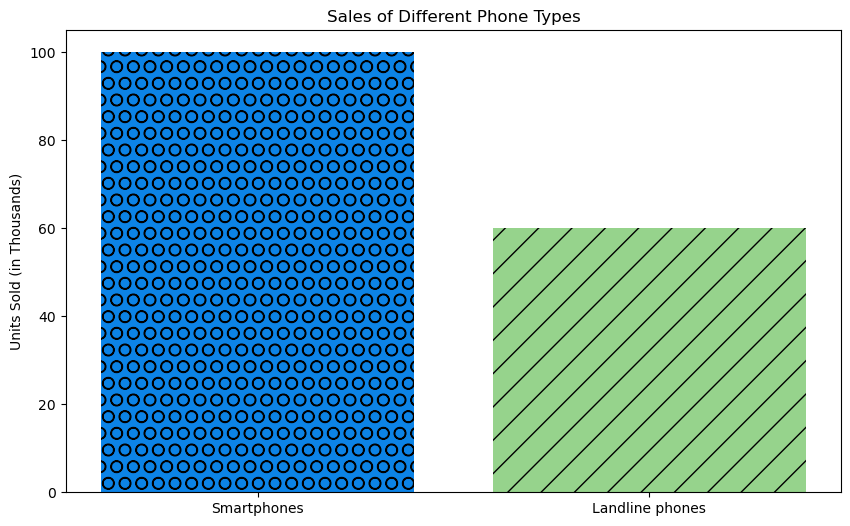

  5%|██████▌                                                                                                                          | 2/39 [00:34<10:13, 16.58s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


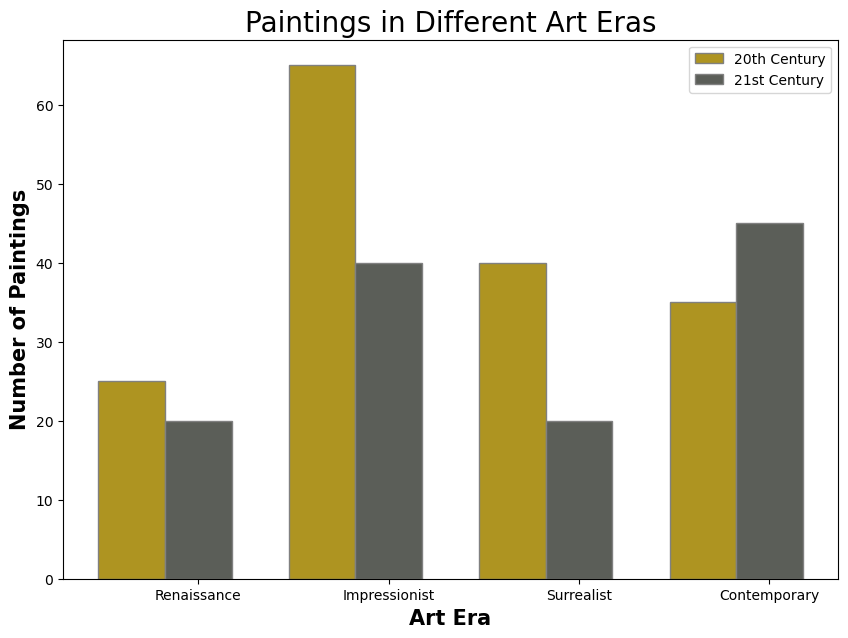

  8%|█████████▉                                                                                                                       | 3/39 [00:57<11:49, 19.70s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


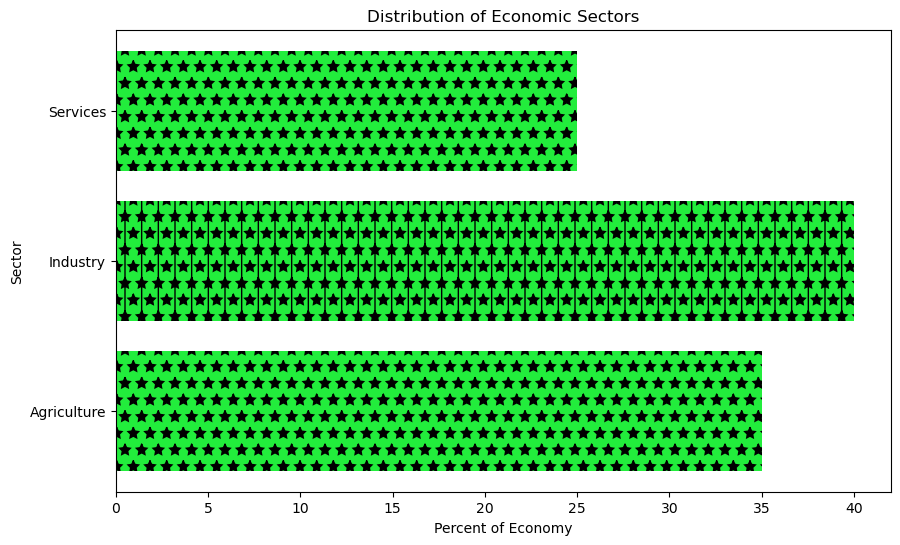

 10%|█████████████▏                                                                                                                   | 4/39 [01:10<09:50, 16.87s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


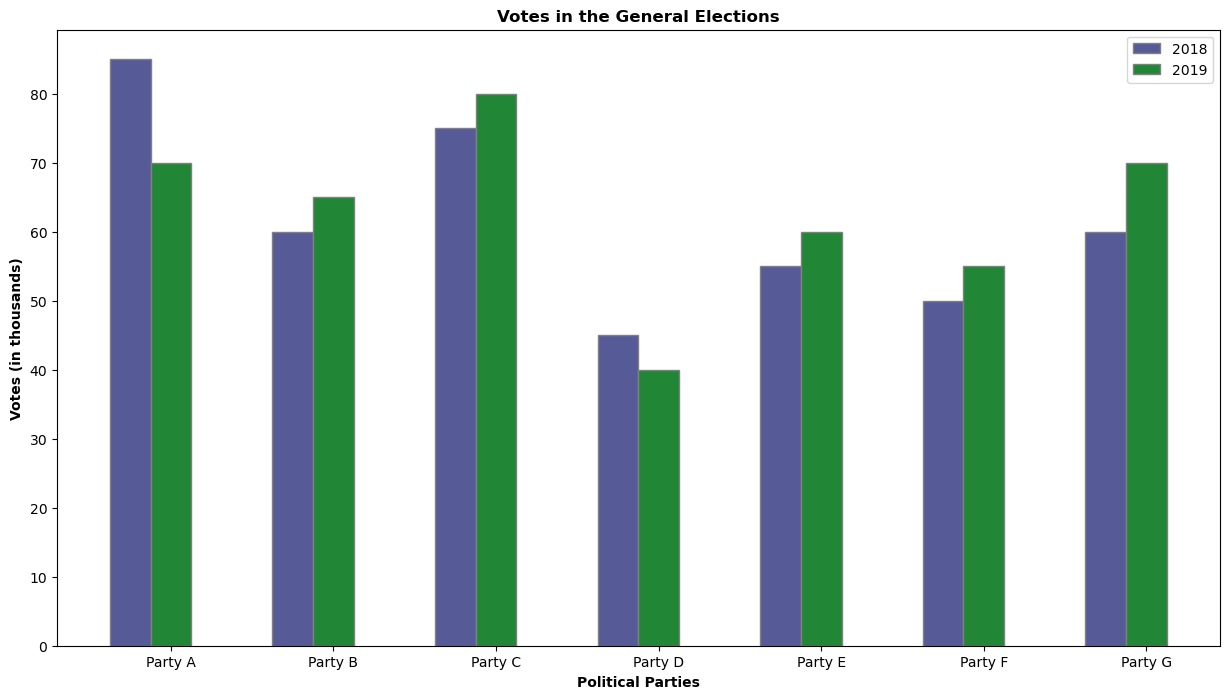

 13%|████████████████▌                                                                                                                | 5/39 [01:36<11:34, 20.42s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


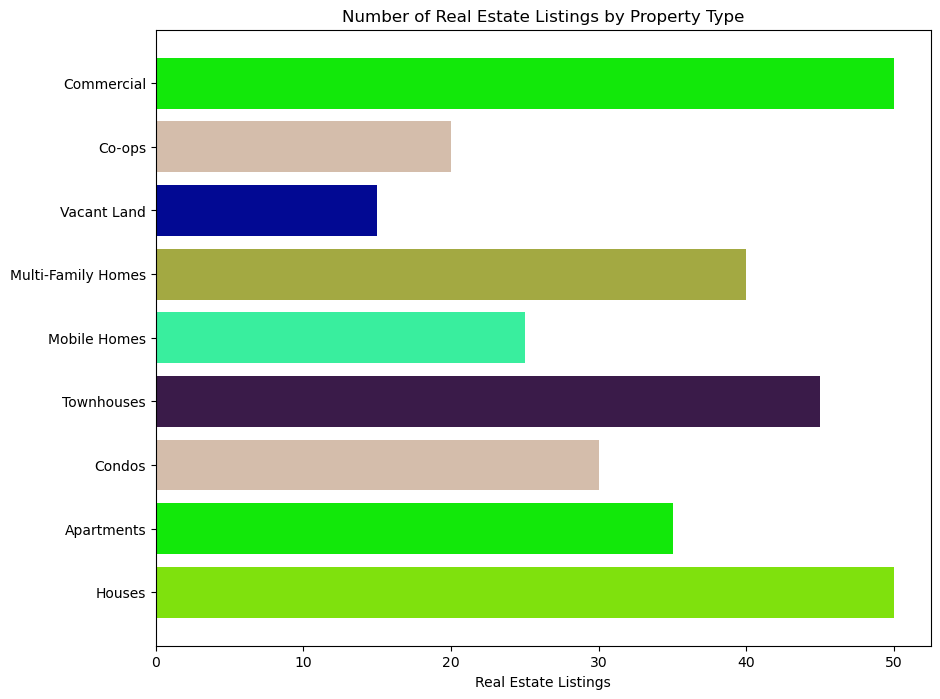

 15%|███████████████████▊                                                                                                             | 6/39 [01:59<11:41, 21.26s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


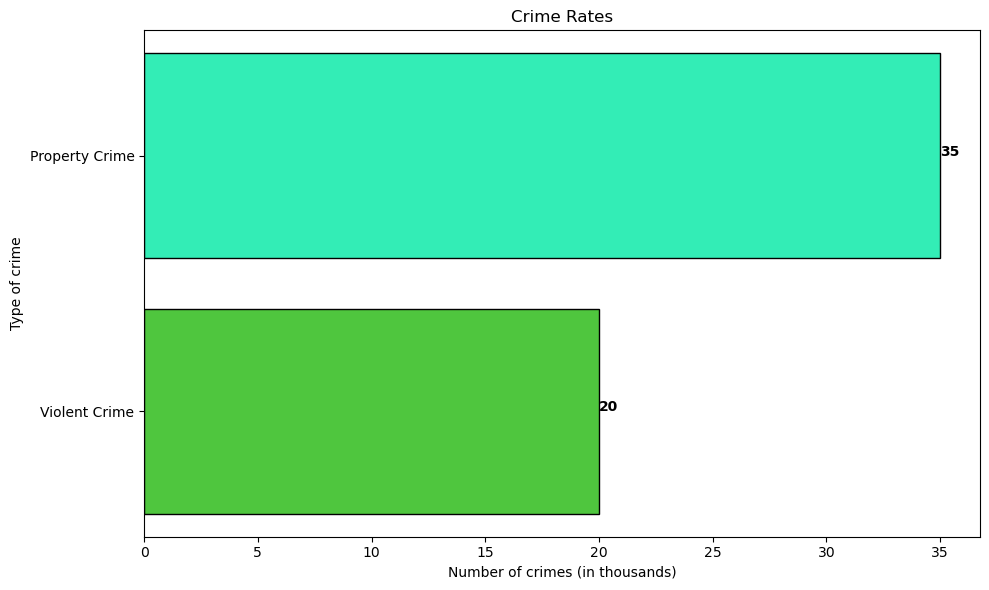

 18%|███████████████████████▏                                                                                                         | 7/39 [02:20<11:10, 20.96s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


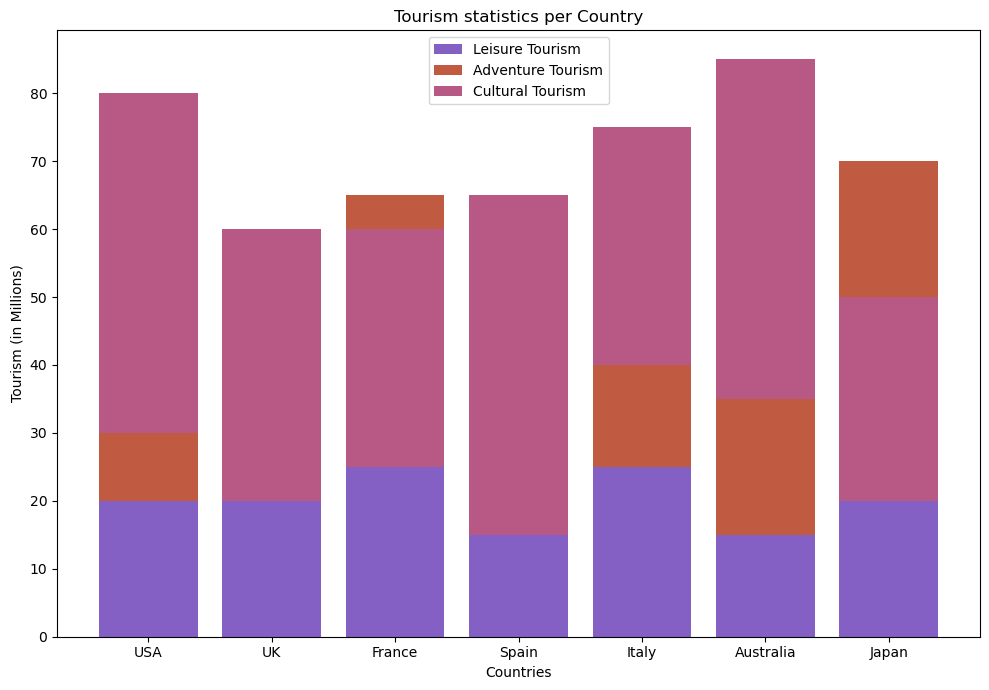

 21%|██████████████████████████▍                                                                                                      | 8/39 [02:39<10:34, 20.47s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


 23%|█████████████████████████████▊                                                                                                   | 9/39 [02:59<10:08, 20.30s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


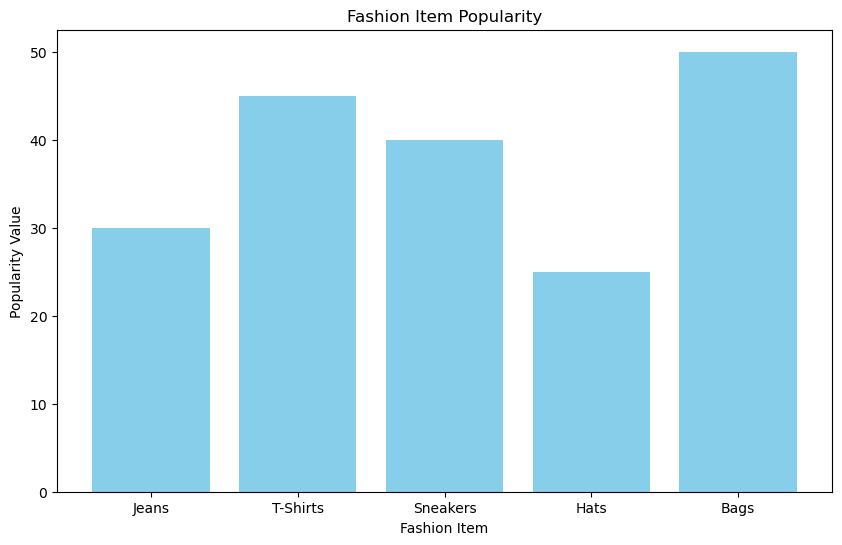

 26%|████████████████████████████████▊                                                                                               | 10/39 [03:11<08:34, 17.73s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


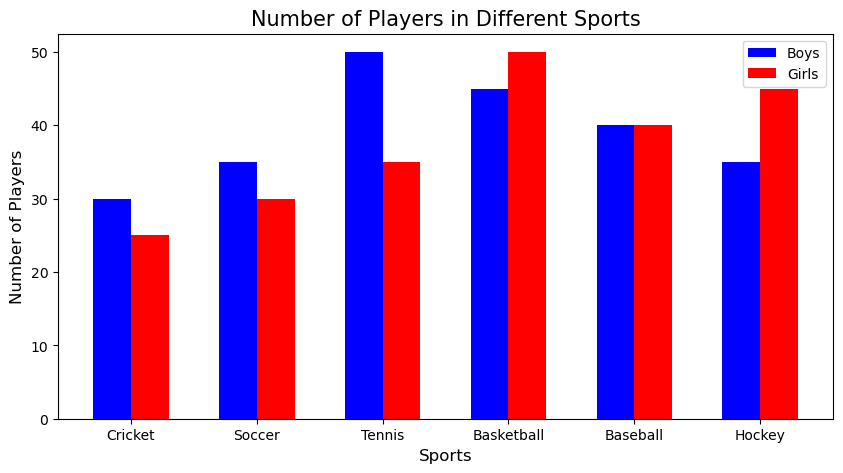

 28%|████████████████████████████████████                                                                                            | 11/39 [03:30<08:27, 18.14s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


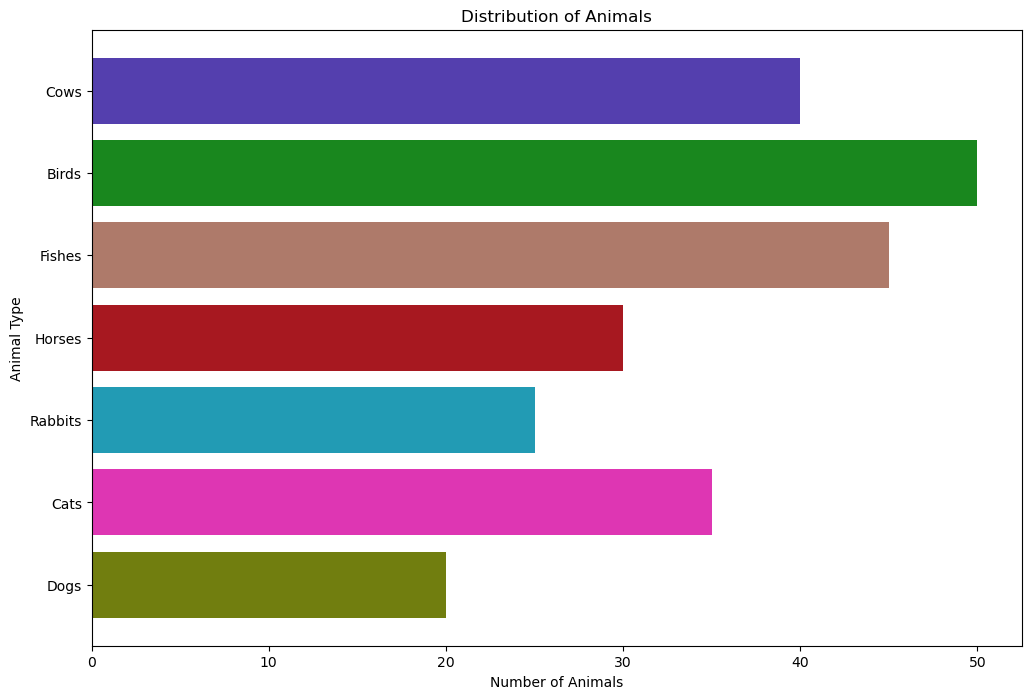

 31%|███████████████████████████████████████▍                                                                                        | 12/39 [03:42<07:20, 16.31s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


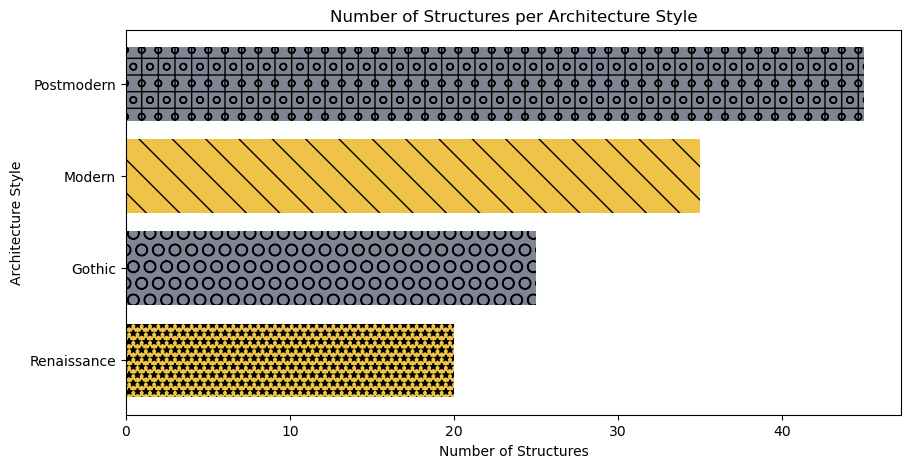

 33%|██████████████████████████████████████████▋                                                                                     | 13/39 [03:57<06:51, 15.83s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


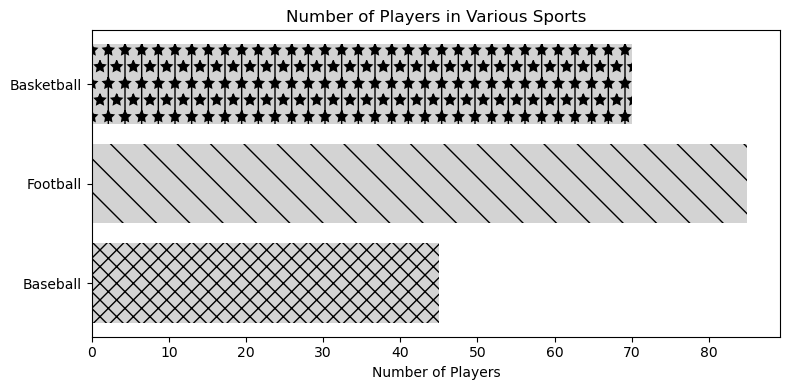

 36%|█████████████████████████████████████████████▉                                                                                  | 14/39 [04:09<06:10, 14.82s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


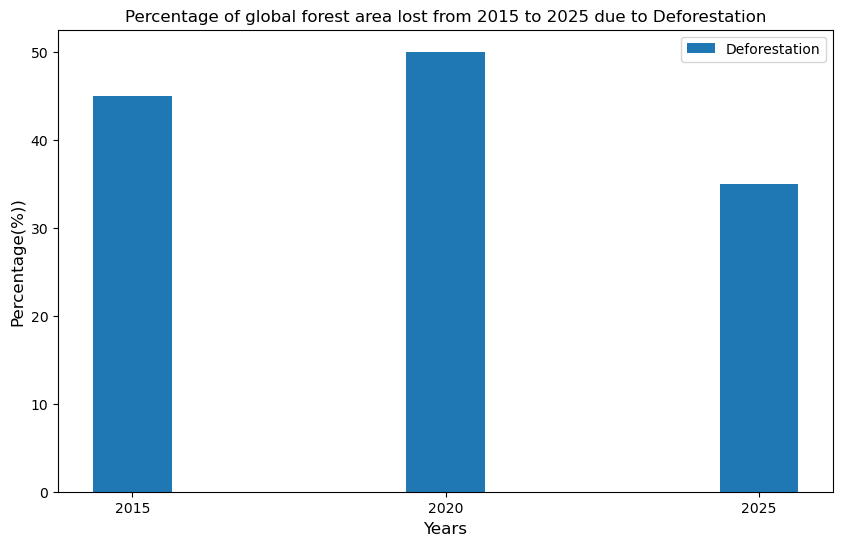

 38%|█████████████████████████████████████████████████▏                                                                              | 15/39 [04:25<06:02, 15.10s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


 41%|████████████████████████████████████████████████████▌                                                                           | 16/39 [04:40<05:45, 15.01s/it]

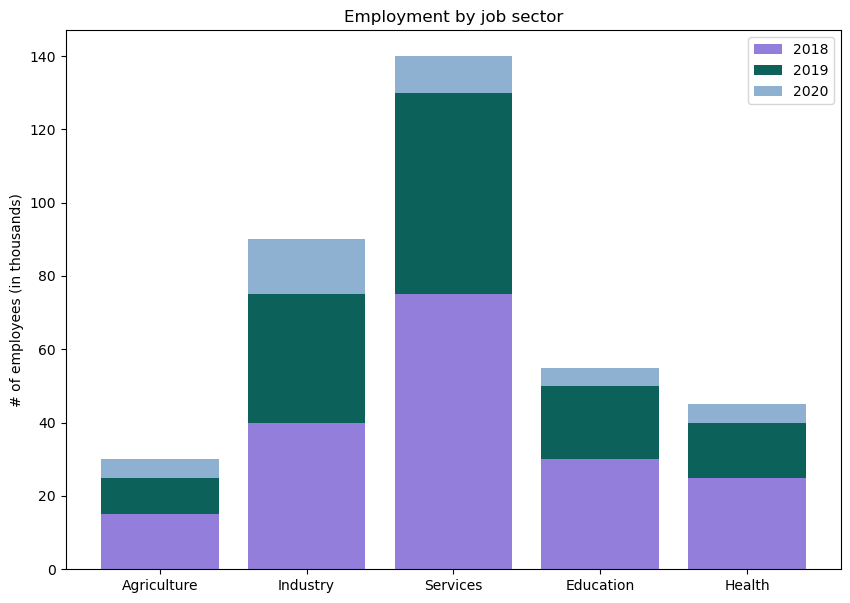

 44%|███████████████████████████████████████████████████████▊                                                                        | 17/39 [04:57<05:44, 15.68s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


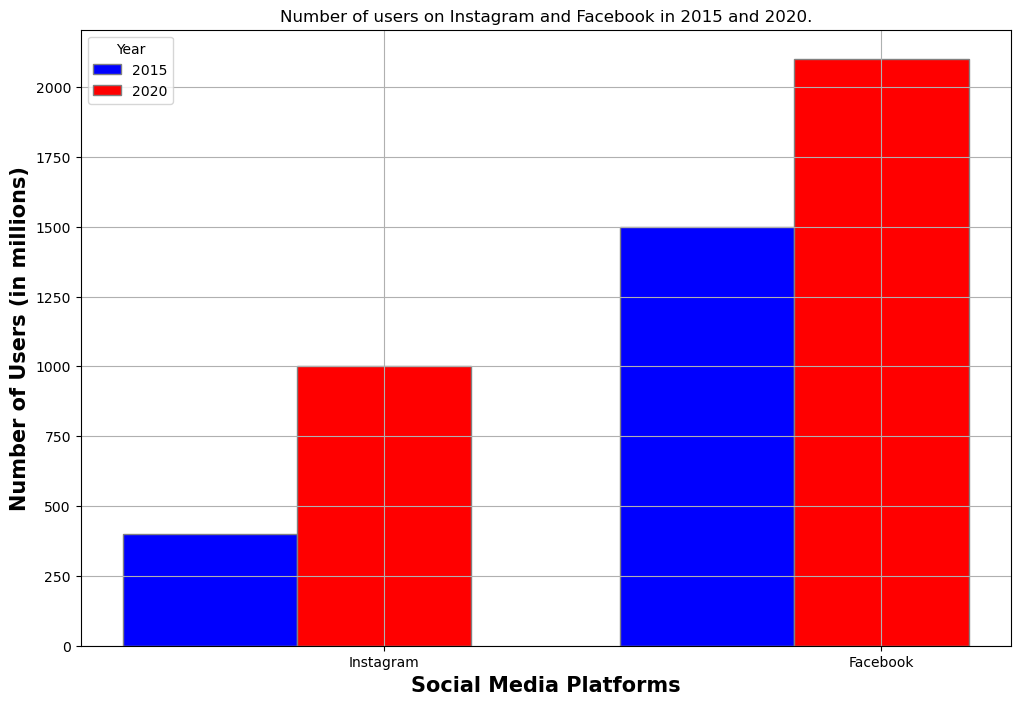

 46%|███████████████████████████████████████████████████████████                                                                     | 18/39 [05:23<06:34, 18.80s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


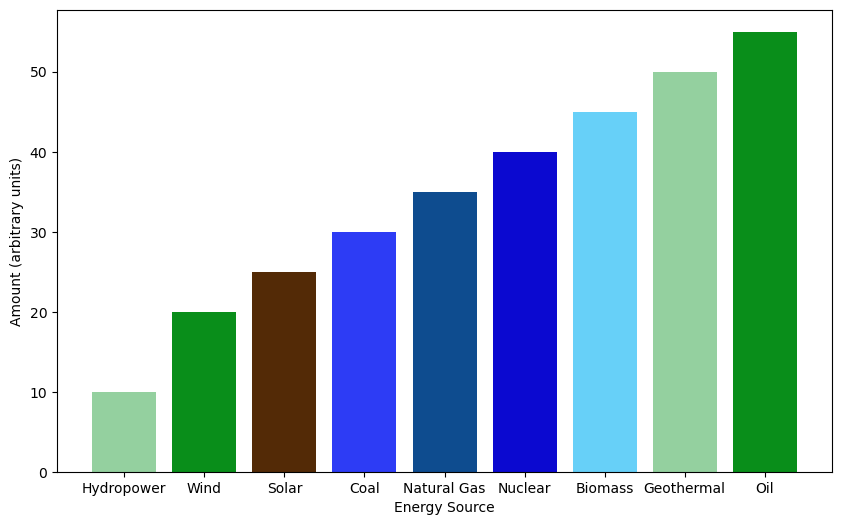

 49%|██████████████████████████████████████████████████████████████▎                                                                 | 19/39 [05:39<05:58, 17.93s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


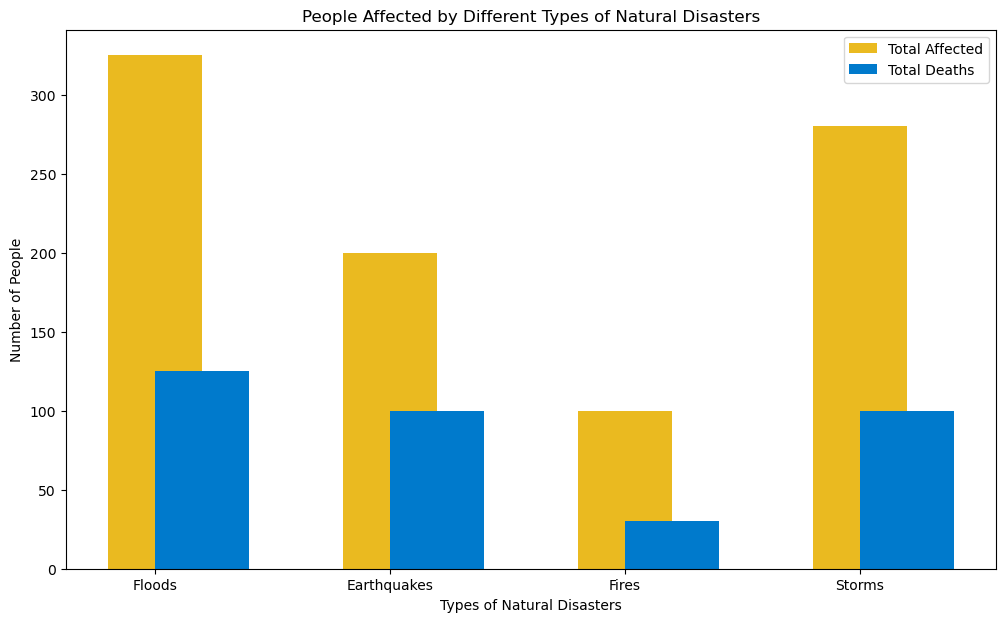

 51%|█████████████████████████████████████████████████████████████████▋                                                              | 20/39 [05:55<05:31, 17.46s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


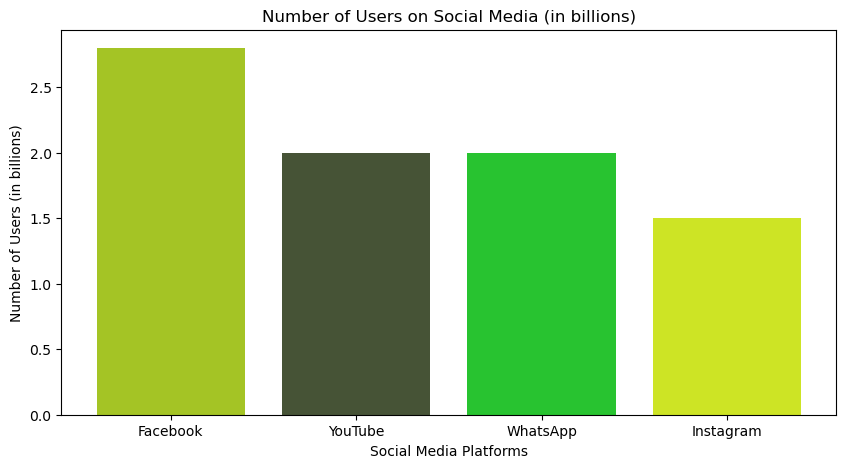

 54%|████████████████████████████████████████████████████████████████████▉                                                           | 21/39 [06:08<04:47, 15.95s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


 56%|████████████████████████████████████████████████████████████████████████▏                                                       | 22/39 [06:33<05:20, 18.85s/it]

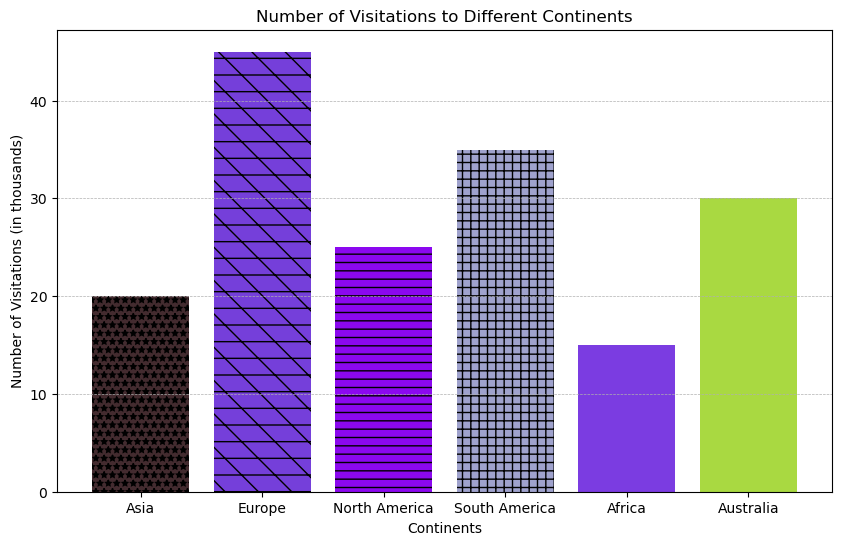

 59%|███████████████████████████████████████████████████████████████████████████▍                                                    | 23/39 [06:54<05:09, 19.32s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


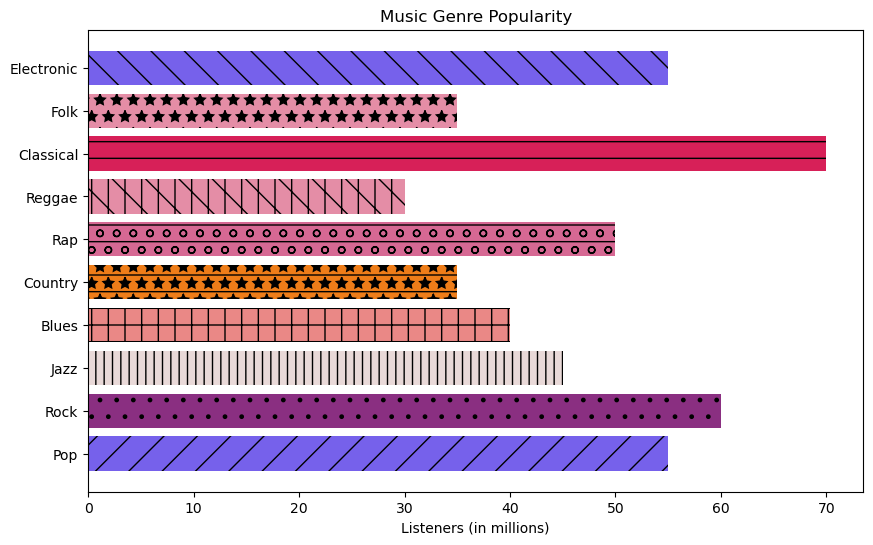

 62%|██████████████████████████████████████████████████████████████████████████████▊                                                 | 24/39 [07:09<04:28, 17.93s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


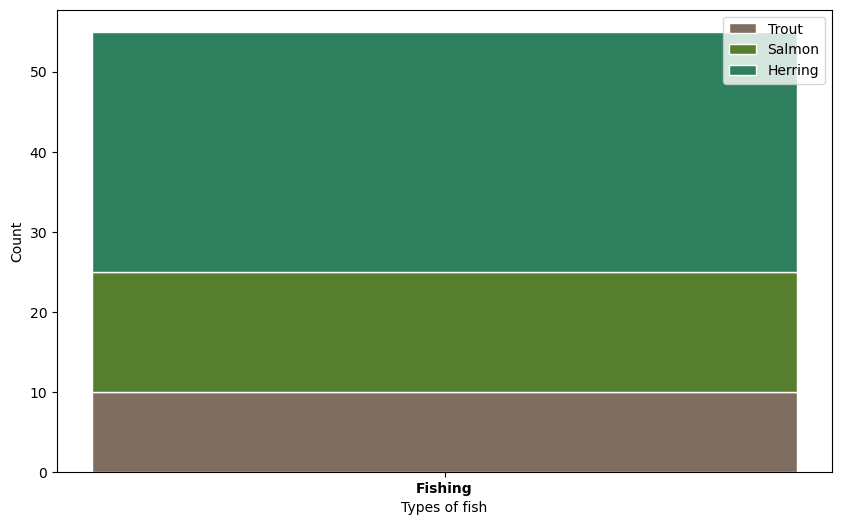

 64%|██████████████████████████████████████████████████████████████████████████████████                                              | 25/39 [07:28<04:17, 18.36s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


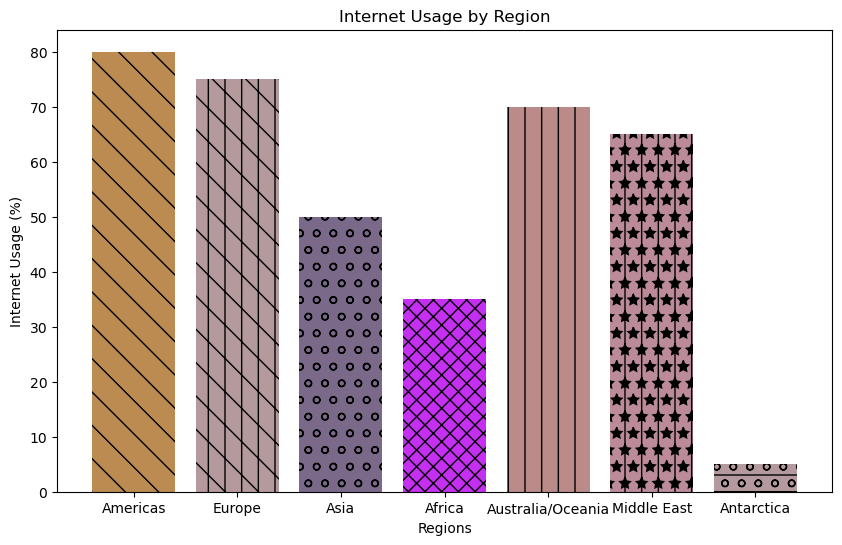

 67%|█████████████████████████████████████████████████████████████████████████████████████▎                                          | 26/39 [07:49<04:09, 19.16s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


 69%|████████████████████████████████████████████████████████████████████████████████████████▌                                       | 27/39 [08:07<03:44, 18.72s/it]

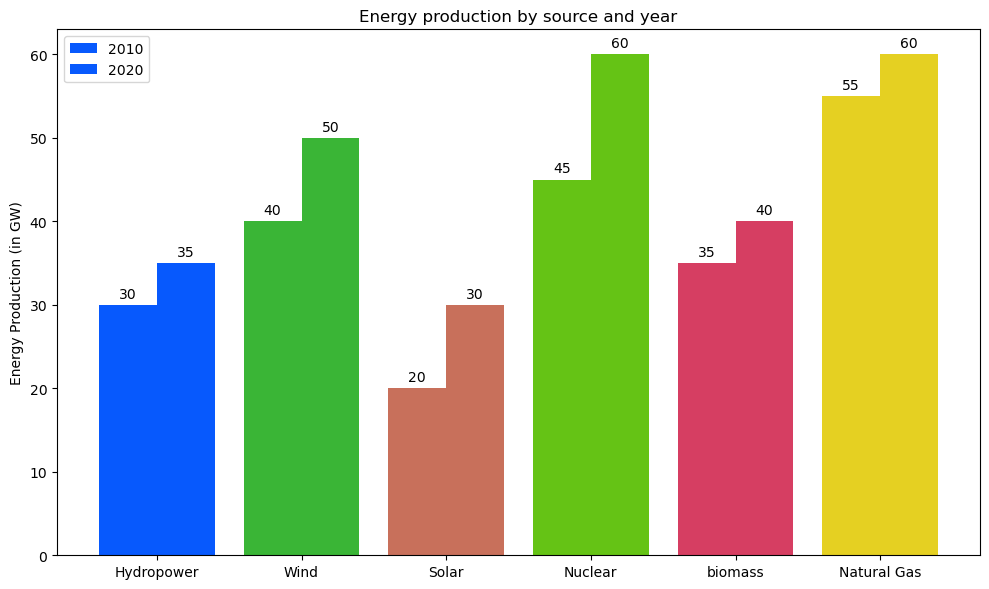

 72%|███████████████████████████████████████████████████████████████████████████████████████████▉                                    | 28/39 [08:35<03:56, 21.49s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


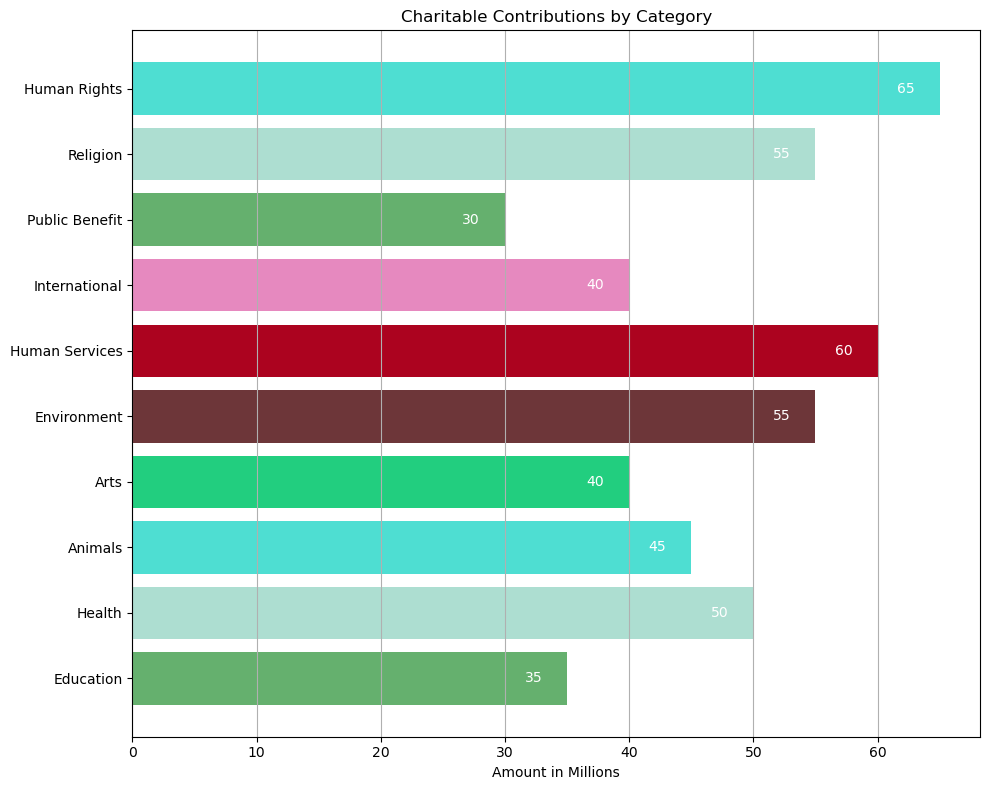

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                | 29/39 [08:53<03:25, 20.57s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


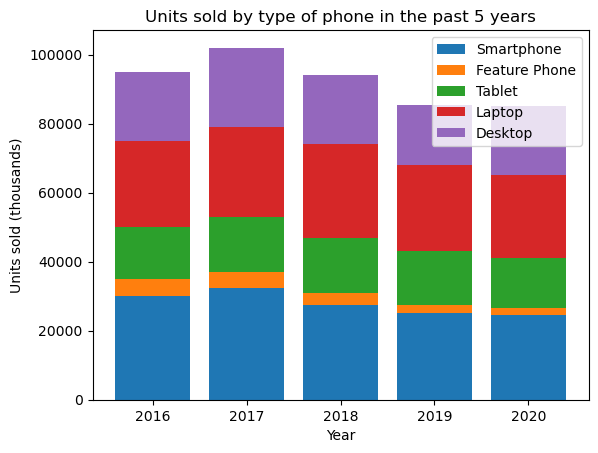

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 30/39 [09:22<03:28, 23.16s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


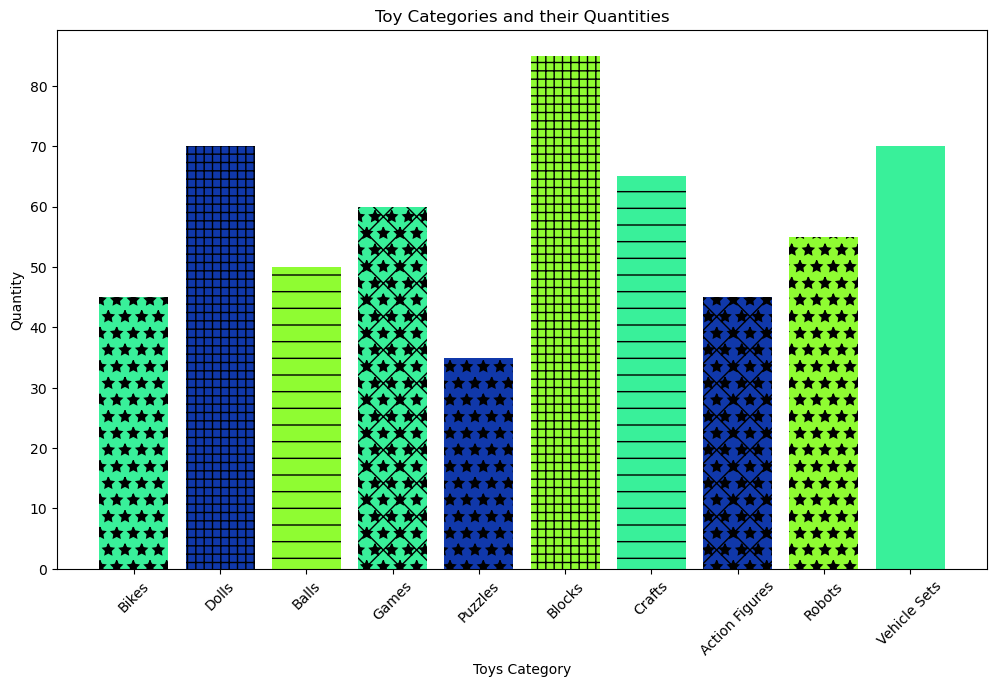

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 31/39 [09:41<02:55, 21.90s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


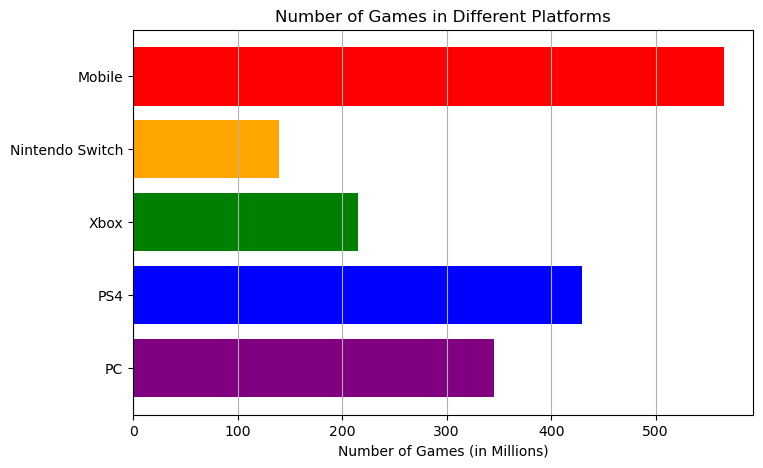

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 32/39 [09:54<02:13, 19.07s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


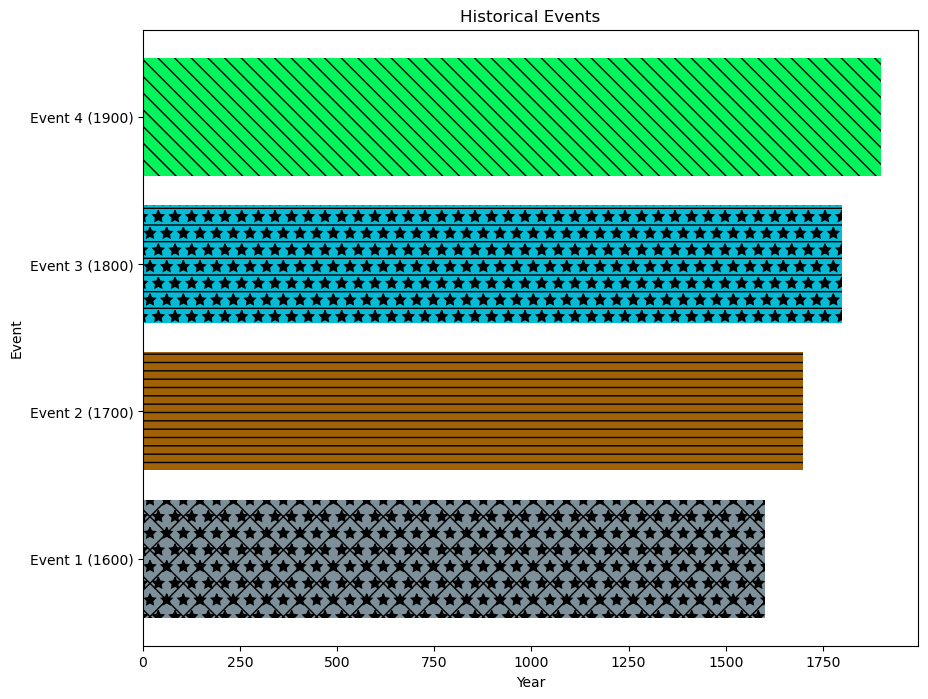

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 33/39 [10:18<02:03, 20.56s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


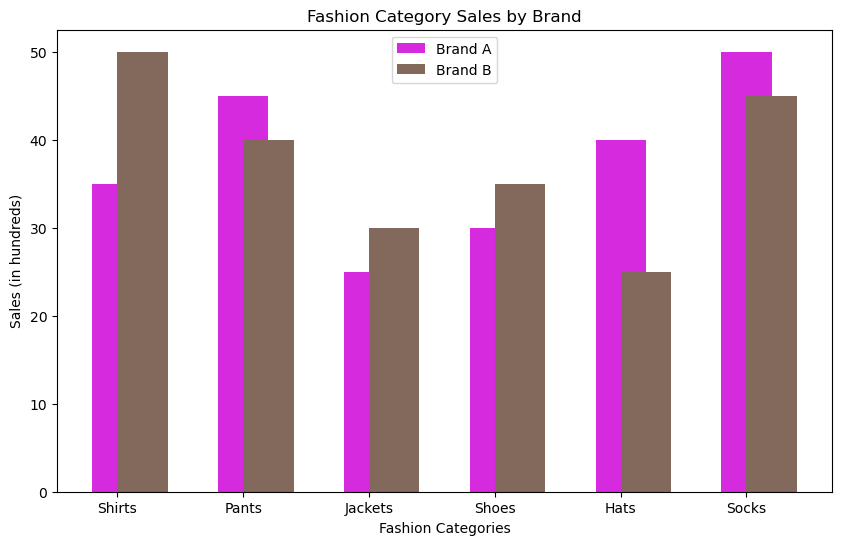

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 34/39 [10:33<01:35, 19.03s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


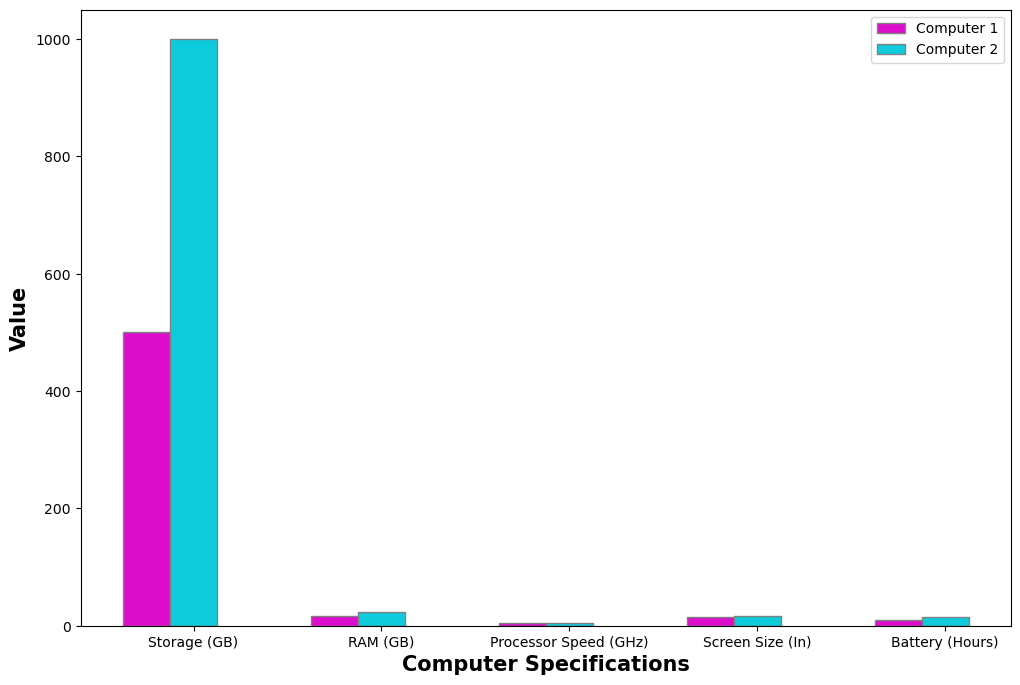

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 35/39 [10:54<01:18, 19.59s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


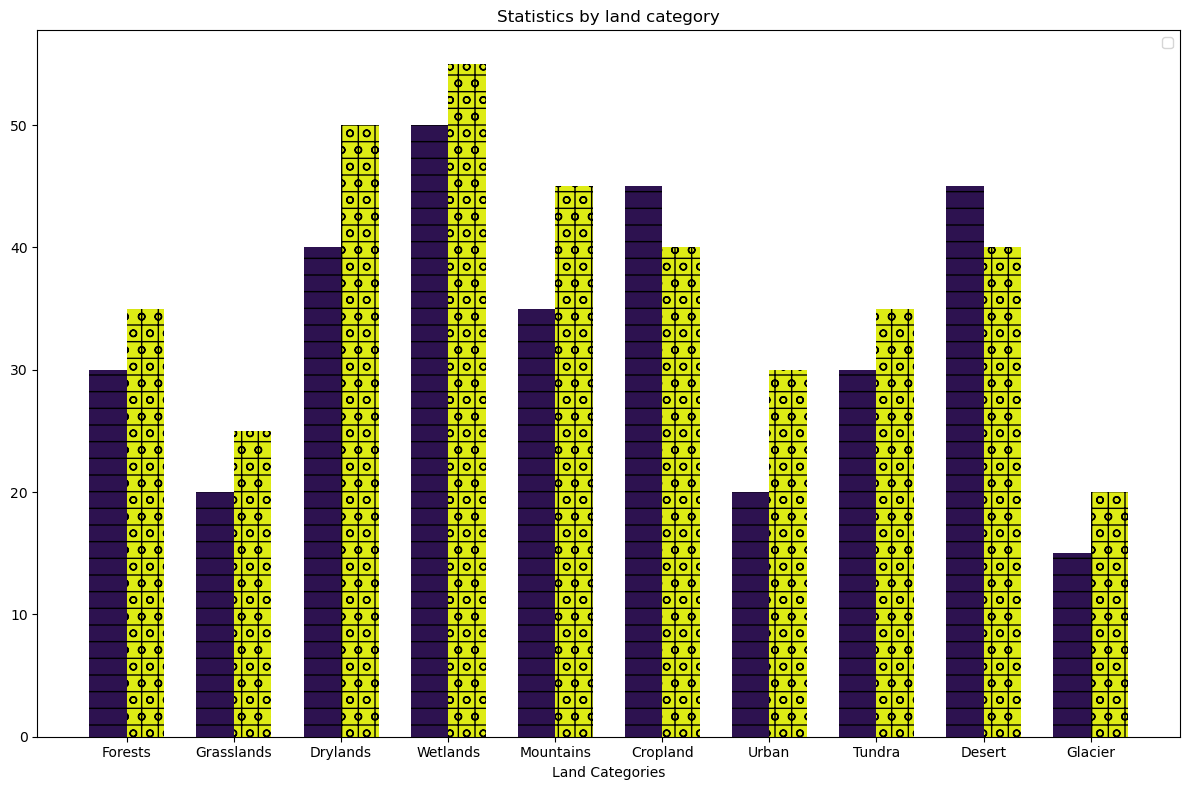

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 36/39 [11:19<01:03, 21.30s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


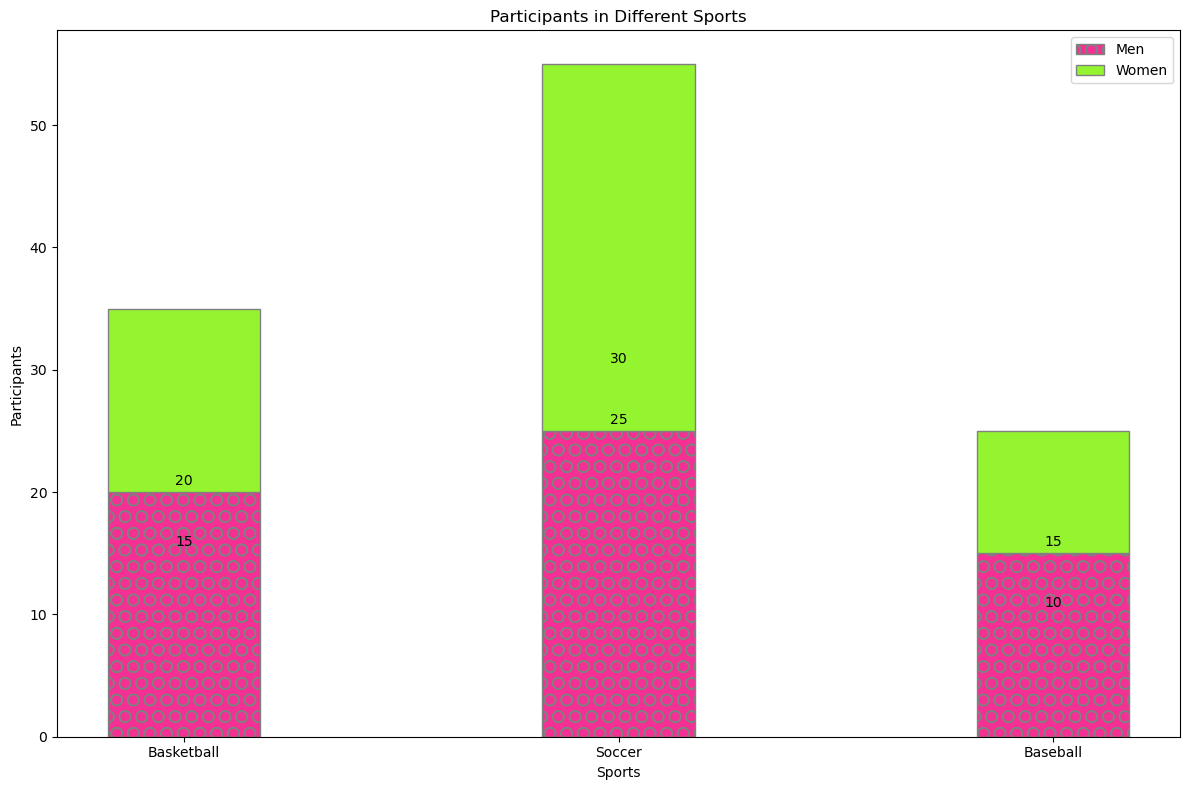

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 37/39 [11:43<00:44, 22.12s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


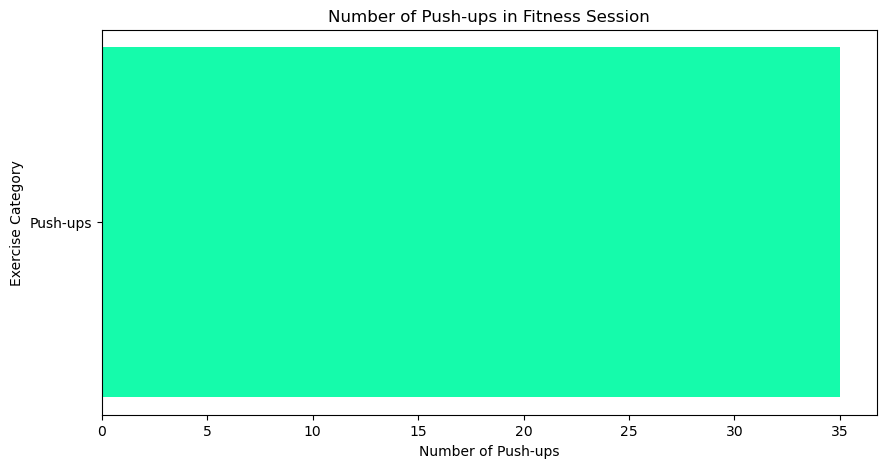

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 38/39 [11:56<00:19, 19.27s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


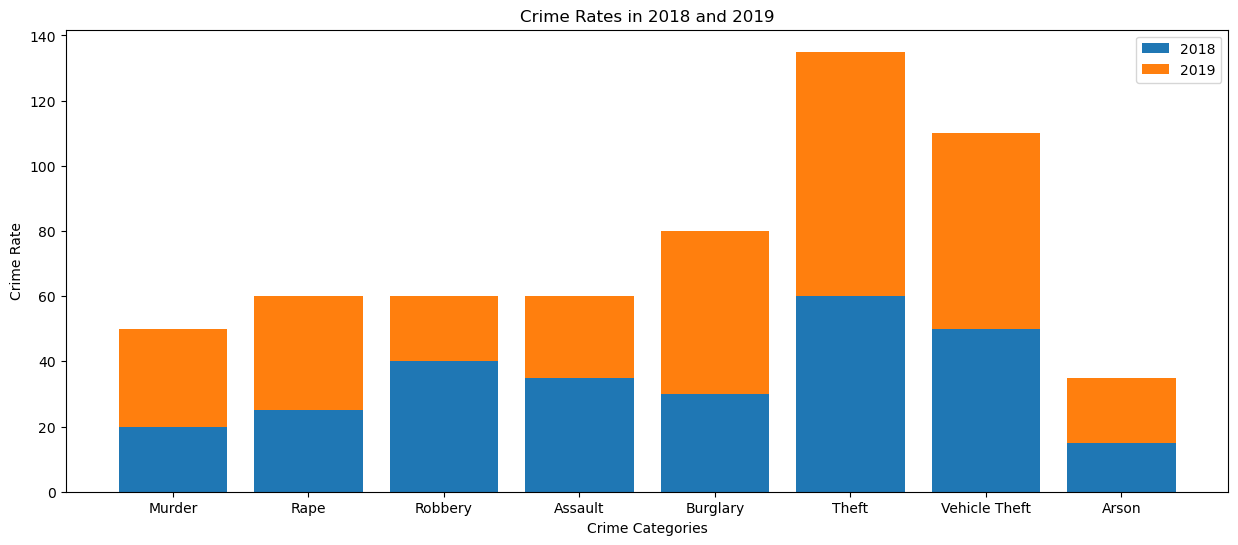

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [12:13<00:00, 18.81s/it]

entered json function
JSON file exists: bar_charts/bar_charts_visual_linguistic_train.json
Data successfully saved.


In [5]:
client = OpenAI()
responses = []
for i in tqdm(range(162, num_samples + 1)):
    bar_chart_type = generate_random_bar_chart_type()
    num_categories = random.randint(1, 10)
    topic = generate_random_bar_chart_topic()
    question_type, answer_type = generate_random_question_type()
    color_instruct = generate_random_color_instruct(num_categories)
    hatch_instruct = generate_random_hatch_instruct(num_categories)
    image_path = f"{category}/{file_path_prefix}/{subdir}/{i}.png"
    prompt_messages=[
        {
          "role": "system",
          "content": "You are a fantastic python programmer writing code to generate Matplotlib bar charts given the constraints, and also a relevant math problem and final answer."
        },
        {
          "role": "user",
          "content": f"""Write a python program that uses matplotlib to create a {bar_chart_type} with {num_categories} categories. 
          The topic of the bar chart should be {topic}, and any values in the chart must be a round number. 
          I.e., values like 17, 18, or 19 are hard to read in a chart that has axis marks every 5 numbers, 
          so values rounded to the nearest 5 would be helpful in this case. f{color_instruct}
          f{hatch_instruct}
          Make any labels/category titles on the chart relevant to the topic.
          If multiple labels are very long, make sure the figure size is sufficiently large to avoid word overlap.
          Do not make any calls to np.random.
          Make a plt.savefig('{image_path}') call in the code as well. Create one singular {question_type} question 
          related to the chart. Demark this question with <<<QUESTION>> at the beginning. 
          Write the answer options in a one-line python list demarked at the beginning by <<<CHOICES>>>. 
          After the python list, add <<<CHOICES>>> to mark the end of the choices.
          Reason step-by-step about your question. Write ONLY the final {answer_type} answer for that question without any quotes preceeded by the token Answer:. """
        }
    ]
    response = client.chat.completions.create(
      model="gpt-4",
      messages=prompt_messages
    )
    responses.append(response.choices[0].message.content)

    question, answer, choices = extract_question_and_answer(response.choices[0].message.content)
    if question != None and answer != None and choices != None:
        code = extract_code(response.choices[0].message.content)
        if code:
            success = True
            ipython = get_ipython()
            if ipython:
                try:
                    ipython.run_cell(code)
                except Exception as e:
                    print(f"Error {e} thrown from GPT-generated code in ipython.run_cell.")
                    success = False
            else:
                try:
                    exec(code, globals())
                except Exception as e:
                    print(f"Error {e} thrown from GPT-generated code in exec.")
                    success = False
            
            if not success:
                continue
            image_load_success = True 
            try:
                # Load an image file
                image = Image.open(image_path)
                
                # Convert the image to a byte array
                buffered = io.BytesIO()
                image.save(buffered, format="PNG")  # You can change the format as needed
                img_bytes = buffered.getvalue()
                
                # Encode the byte array to a Base64 string
                img_str = base64.b64encode(img_bytes).decode('utf-8')
            except Exception as e:
                image_load_success = False
                print(f"Image loading error {e}.")

            if image_load_success:
                choices_success = True
                try:
                    list_choices = convert_choices_string_to_list(choices)
                except Exception as e:
                    choices_success = False
                    continue
                if choices_success:
                    id = get_id(category, file_path_prefix, subdir, i)
                    data_to_append = {
                        "id": id,
                        "question": question,
                        "answer": answer,
                        "choices": list_choices,
                        "gpt_response": response.choices[0].message.content,
                        "image": image_path,
                        "decoded_image": img_str
                    }
                    
                    save_to_json_file(json_file_path, data_to_append)


In [ ]:
for response in responses:
    if 'usage' in response:
        total_input_tokens += response['usage'].get('prompt_tokens', 0)
        total_output_tokens += response['usage'].get('completion_tokens', 0)
        total_tokens += response['usage'].get('total_tokens', 0)

# Print the results
print(f"Total input tokens: {total_input_tokens}")
print(f"Total output tokens: {total_output_tokens}")
print(f"Total tokens: {total_tokens}")